# "Hot" Plasma Paper II Figures
Build all the figures needed for "Hot" Plasma Paper II

In [102]:
#Import needed libraries
import sys
import os
import pickle
import copy
from imp import reload

import numpy as np
import scipy.optimize
from astroML import density_estimation
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
plt.style.use('papers')
import seaborn.apionly as sns

sys.path.append(os.path.join(os.environ['RESEARCH_DIR'],'EBTEL_analysis/src/'))

import ebtel_dem as ebd
import ebtel_plot_em as ebpe
import em_binner as emb
reload(ebd)
reload(ebpe)
reload(emb)

%matplotlib inline

/opt/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


## Figure Inventory

* Figure 1: Tikz figure showing parameter space
* Figure 2: Sample heating functions: uniform, power-law, power-law + scaling
* Figure 3: $2\times3$ grid of EM distributions for $\alpha=-2.5$, single-fluid case; power-law, power-law + scaling, uniform and NEI counterparts all included in each panel for six sample heating rates.
* Figure 4: Same as Figure 3, but for electron heating
* Figure 5: Same as Figure 3, but for ion heating
* (Optional Figure): Same as Figure 3, but for single-fluid case
* Figure 6: Sample $T,n$ profiles to show different heating functions in background-density
* Figure 7: Two panel figure showing variability of hot EM slope as fit bounds change
* Figure 8: Distribution of Brosius EM ratio as a function of waiting time for electron heating; two panels: categorized by heating function type and waiting time
* Figure 9: Same as Figure 8, but for ion heating

Define some convenient paths before proceeding.

In [2]:
#set some commonly used paths
figs_root_ieq='/data/datadrive2/EBTEL_figs/%s_heating_runs/alpha%s'
figs_root_nei='/data/datadrive2/IonPopSolver_figs/%s_heating_runs/alpha%s'
save_file_ext = 'ebtel_L40.0_tpulse200.0_alpha%s_%s_heating'
paper_figs_save_root=os.path.join(os.environ['RESEARCH_DIR'],'hot_plasma_nanoflare_trains/results/')
root_dir = os.path.split(figs_root_ieq.replace('EBTEL_figs','EBTEL_runs'))[0]
root_dir_nei = os.path.split(figs_root_nei.replace('IonPopSolver_figs','IonPopSolver_runs'))[0]
tn_ext = 'ebtel_L40.0_tn%d%s_tpulse200.0_rka4'

## Figure 2

First get three sample heating functions and plot them.

In [3]:
#Get sample heating data
hf_uni = np.loadtxt(os.path.join(root_dir%'electron','alphauniform','data',tn_ext%(1000,''),tn_ext%(1000,'')+'_0.txt'))
hf_uni = [hf_uni[:,0],hf_uni[:,15]]
lf_uni = np.loadtxt(os.path.join(root_dir%'electron','alphauniform','data',tn_ext%(5000,''),tn_ext%(5000,'')+'_0.txt'))
lf_uni = [lf_uni[:,0],lf_uni[:,15]]
if_pl = np.loadtxt(os.path.join(root_dir%'electron','alpha1.5','data',tn_ext%(2000,'-b1.0'),tn_ext%(2000,'-b1.0')+'_0.txt'))
if_pl = [if_pl[:,0],if_pl[:,15]]
if_pl_ns = np.loadtxt(os.path.join(root_dir%'electron','alpha1.5','data',tn_ext%(2000,''),tn_ext%(2000,'')+'_0.txt'))
if_pl_ns = [if_pl_ns[:,0],if_pl_ns[:,15]]

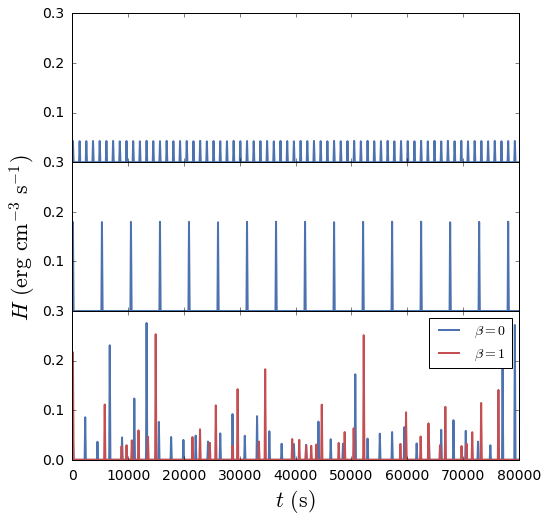

In [4]:
#Plot sample heating functions
fig,axes = plt.subplots(3,1,figsize=(8,8),sharex=True)
plt.subplots_adjust(hspace=0)
#plot data
axes[0].plot(hf_uni[0],hf_uni[1],color=sns.color_palette('deep')[0])
axes[1].plot(lf_uni[0],lf_uni[1],color=sns.color_palette('deep')[0])
axes[2].plot(if_pl_ns[0],if_pl_ns[1],color=sns.color_palette('deep')[0],label=r'$\beta=0$')
axes[2].plot(if_pl[0],if_pl[1],color=sns.color_palette('deep')[2],label=r'$\beta=1$')
#axes limits
axes[0].set_ylim([0,.3])
axes[1].set_ylim([0,.3])
axes[2].set_ylim([0,.3])
#fix tick labels
nbins = 3#len(axes[2].get_yticklabels())
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=nbins))
nbins = 3#len(axes[1].get_yticklabels())
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=nbins,prune='lower'))
nbins = 3#len(axes[0].get_yticklabels())
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=nbins,prune='lower'))
#labels
axes[1].set_ylabel(r'$H$ $(\mathrm{erg}$ $\mathrm{cm}^{-3}$ $\mathrm{s}^{-1}\mathrm{)}$')
axes[2].set_xlabel(r'$t$ $\mathrm{(s)}$')
#legend
axes[2].legend(loc=1)
#save
plt.savefig(os.path.join(paper_figs_save_root,'heating_functions.pdf'),format='pdf',dpi=1000)

## Figure 3
$2\times3$ grid of emission measure ratios for a variety of heating scenarios; single-fluid

In [5]:
#configure all labels, colors and linestyles
labels=[r'$\alpha=-2.5$,'+'\n'+r'$\beta=0$, $\mathrm{IEQ}$',r'$\alpha=-2.5$,'+'\n'+r'$\beta=1$, $\mathrm{IEQ}$',
        r'$\alpha=-2.5$, $\beta=0$, $\mathrm{NEI}$',r'$\alpha=-2.5$, $\beta=1$, $\mathrm{NEI}$',
       r'$\mathrm{uniform}$, $\mathrm{IEQ}$',r'$\mathrm{uniform}$, $\mathrm{NEI}$']
linestyles = 2*['solid'] + 2*['dashed'] + ['solid'] + ['dashed']
colors = []
colors.append(sns.color_palette('deep')[0])
colors.append(sns.color_palette('deep')[1])
colors.append(sns.color_palette('deep')[0])
colors.append(sns.color_palette('deep')[1])
colors.append(sns.color_palette('deep')[2])
colors.append(sns.color_palette('deep')[2])
show_leg = 2*[True] + 2*[False] + [True] + [False]
tw_select=np.array([250,750,1500,2500,3750,5000])
show_sigma = 2*[True] + 2*[False] + [True] + [False]

In [6]:
files = [os.path.join(figs_root_ieq%('single','2.5'),save_file_ext%('2.5','single')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('single','2.5'),save_file_ext%('2.5-b1.0','single')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('single','2.5'),save_file_ext%('2.5','single')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('single','2.5'),save_file_ext%('2.5-b1.0','single')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('single','uniform'),save_file_ext%('uniform','single')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('single','uniform'),save_file_ext%('uniform','single')+'.lvl2_em_statistics.pickle')]

In [7]:
ebpe.make_top_em_grid(files=files,
                      labels=labels,
                      tw_select=tw_select,
                      nrows=2,ncols=3,
                      figsize=(16,8),
                      xlims=[10**5.5,10**7.5],ylims=[1.5e+25,2e+28],
                      fontsize=22.,alfs=14./22.,
                      xlab_pos=[0.5,0.05],ylab_pos=[0.075,0.5],
                      linestyles=linestyles,colors=colors,
                      show_leg=show_leg,show_sigma=show_sigma,
                      leg_pos=3,leg_ax=0,
                      print_fig_filename=os.path.join(paper_figs_save_root,'em_grid_single_a25'),fformat='pdf',dpi=400,
                      rasterized_fig_option=True
                     )

## Figure 4
$2\times3$ grid of emission measure ratios for a variety of heating scenarios; electron heating

In [8]:
files = [os.path.join(figs_root_ieq%('electron','2.5'),save_file_ext%('2.5','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('electron','2.5'),save_file_ext%('2.5-b1.0','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('electron','2.5'),save_file_ext%('2.5','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('electron','2.5'),save_file_ext%('2.5-b1.0','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('electron','uniform'),save_file_ext%('uniform','electron')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('electron','uniform'),save_file_ext%('uniform','electron')+'.lvl2_em_statistics.pickle')]

In [9]:
ebpe.make_top_em_grid(files=files,
                      labels=labels,
                      tw_select=tw_select,
                      nrows=2,ncols=3,
                      figsize=(16,8),
                      xlims=[10**5.5,10**7.5],ylims=[1.5e+25,2e+28],
                      fontsize=22.,alfs=14./22.,
                      xlab_pos=[0.5,0.05],ylab_pos=[0.075,0.5],
                      linestyles=linestyles,colors=colors,
                      show_leg=show_leg,show_sigma=show_sigma,
                      leg_pos=3,leg_ax=0,
                      print_fig_filename=os.path.join(paper_figs_save_root,'em_grid_electron_a25'),fformat='pdf',dpi=400,
                      rasterized_fig_option=True
                     )

## Figure 5
Same as above, but now for ion heating.

In [10]:
files = [os.path.join(figs_root_ieq%('ion','2.5'),save_file_ext%('2.5','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('ion','2.5'),save_file_ext%('2.5-b1.0','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('ion','2.5'),save_file_ext%('2.5','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('ion','2.5'),save_file_ext%('2.5-b1.0','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_ieq%('ion','uniform'),save_file_ext%('uniform','ion')+'.lvl2_em_statistics.pickle'),
        os.path.join(figs_root_nei%('ion','uniform'),save_file_ext%('uniform','ion')+'.lvl2_em_statistics.pickle')]

In [11]:
ebpe.make_top_em_grid(files=files,
                      labels=labels,
                      tw_select=tw_select,
                      nrows=2,ncols=3,
                      figsize=(16,8),
                      xlims=[10**5.5,10**7.5],
                      ylims=[1.5e+25,2e+28],
                      fontsize=22.,alfs=14./22.,
                      xlab_pos=[0.5,0.05],ylab_pos=[0.075,0.5],
                      linestyles=linestyles,colors=colors,
                      show_leg=show_leg,show_sigma=show_sigma,
                      leg_pos=3,leg_ax=0,
                      print_fig_filename=os.path.join(paper_figs_save_root,'em_grid_ion_a25'),fformat='pdf',dpi=400,
                      rasterized_fig_option=True
                     )

## Figure 6
Sample $T(t),n(t)$ profiles to show differences in density at onset of heating in uniform versus power-law heating functions.

In [12]:
#gather parameters from data sets
tn_sample_val = 2500
tn_samples_ieq = {'uniform':{},
                  'power_law':{},
                  'power_law_scaling':{}}
tn_samples_nei = {'uniform':{},
                  'power_law':{},
                  'power_law_scaling':{}}
data_dir_ieq = os.path.join(root_dir%'electron','alpha2.5/data/',tn_ext)
data_dir_nei = os.path.join(root_dir_nei%'electron','alpha2.5/data/',tn_ext)
#pl
i = len([fn for fn in os.listdir(data_dir_ieq%(tn_sample_val,'')) if 'heat_amp' not in fn])
i_run = 123#np.random.randint(0,i-1) #259
print('For beta=0, Using run number %d from tn=%d'%(i_run,tn_sample_val))
data = np.loadtxt(os.path.join(data_dir_ieq%(tn_sample_val,''),tn_ext%(tn_sample_val,'')+'_%d.txt'%i_run))
tn_samples_ieq['power_law']={'t':data[:,0],'T':data[:,1],'n':data[:,3],'q':data[:,15]}
data = np.loadtxt(os.path.join(data_dir_nei%(tn_sample_val,''),tn_ext%(tn_sample_val,'')+'_%d.ips_results.txt'%i_run))
tn_samples_nei['power_law']={'t':data[:,0],'T':data[:,2],'n':data[:,3]}
#scaling
i = len([fn for fn in os.listdir(data_dir_ieq%(tn_sample_val,'-b1.0')) if 'heat_amp' not in fn])
i_run = 240#np.random.randint(0,i-1) #193
print('For beta=1, Using run number %d from tn=%d'%(i_run,tn_sample_val))
data = np.loadtxt(os.path.join(data_dir_ieq%(tn_sample_val,'-b1.0'),tn_ext%(tn_sample_val,'-b1.0')+'_%d.txt'%i_run))
tn_samples_ieq['power_law_scaling']={'t':data[:,0],'T':data[:,1],'n':data[:,3],'q':data[:,15]}
data = np.loadtxt(os.path.join(data_dir_nei%(tn_sample_val,'-b1.0'),tn_ext%(tn_sample_val,'-b1.0')+'_%d.ips_results.txt'%i_run))
tn_samples_nei['power_law_scaling']={'t':data[:,0],'T':data[:,2],'n':data[:,3]}
#uniform
data_dir = os.path.join(root_dir%'electron','alphauniform/data/',tn_ext)
data = np.loadtxt(os.path.join(data_dir%(tn_sample_val,''),tn_ext%(tn_sample_val,'')+'_0.txt'))
tn_samples_ieq['uniform'] = {'t':data[:,0],'T':data[:,1],'n':data[:,3],'q':data[:,15]}
data_dir = os.path.join(root_dir_nei%'electron','alphauniform/data/',tn_ext)
data = np.loadtxt(os.path.join(data_dir%(tn_sample_val,''),tn_ext%(tn_sample_val,'')+'_0.ips_results.txt'))
tn_samples_nei['uniform'] = {'t':data[:,0],'T':data[:,2],'n':data[:,3]}

For beta=0, Using run number 123 from tn=2500
For beta=1, Using run number 240 from tn=2500


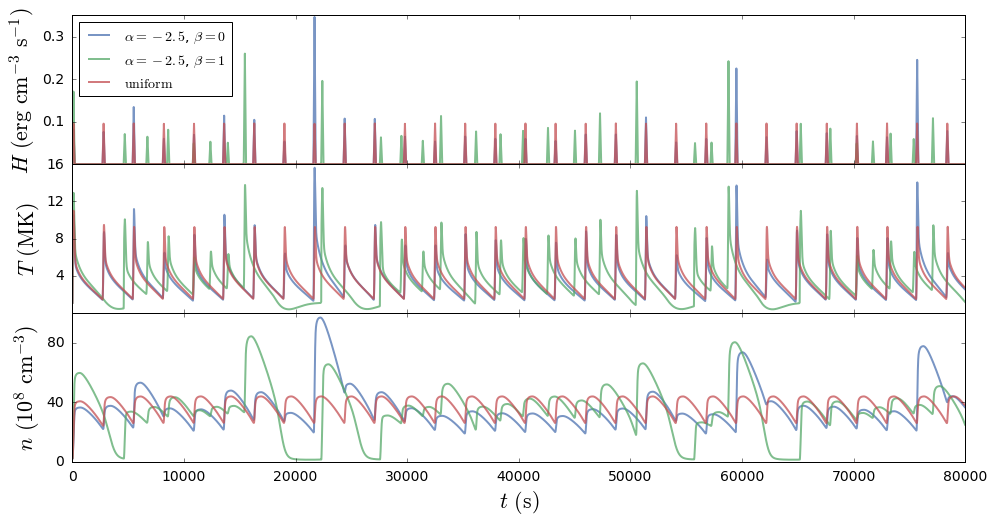

In [13]:
#build figure
fig,axes = plt.subplots(3,1,figsize=(16,8),sharex=True)
axes[0].set_rasterization_zorder(1)
axes[1].set_rasterization_zorder(1)
axes[2].set_rasterization_zorder(1)
types = ['power_law','power_law_scaling','uniform']
labels = [r'$\alpha=-2.5$, $\beta=0$',r'$\alpha=-2.5$, $\beta=1$',r'$\mathrm{uniform}$']
for t,l,i in zip(types,labels,range(len(types))):
    #heating
    axes[0].plot(tn_samples_ieq[t]['t'],tn_samples_ieq[t]['q'],color=sns.color_palette('deep')[i],label=l,alpha=0.75,zorder=0)
    #temperature
    axes[1].plot(tn_samples_ieq[t]['t'],tn_samples_ieq[t]['T']/1e+6,color=sns.color_palette('deep')[i],alpha=0.75,zorder=0)
    #axes[1].plot(tn_samples_nei[t]['t'],tn_samples_nei[t]['T']/1e+6,color=sns.color_palette('deep')[i],linestyle='--',alpha=0.75)
    #density
    axes[2].plot(tn_samples_ieq[t]['t'],tn_samples_ieq[t]['n']/1e+8,color=sns.color_palette('deep')[i],alpha=0.75,zorder=0)
axes[2].set_xlabel(r'$t$ $(\mathrm{s})$')
axes[0].set_ylabel(r'$H$ $(\mathrm{erg}$ $\mathrm{cm}^{-3}$ $\mathrm{s}^{-1})$')
axes[1].set_ylabel(r'$T$ $(\mathrm{MK})$')
axes[2].set_ylabel(r'$n$ $(10^8\,\,\mathrm{cm}^{-3})$')
axes[0].set_xlim([0,8e4])
axes[1].set_xlim([0,8e4])
axes[2].set_xlim([0,8e4])
nbins = 4#len(axes[0].get_yticklabels())
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=nbins,prune='lower'))
nbins = 4#len(axes[1].get_yticklabels())
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=nbins,prune='lower'))
nbins = 3#len(axes[2].get_yticklabels())
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=nbins))
axes[0].legend(loc='best')
plt.subplots_adjust(hspace=0)
plt.savefig(os.path.join(paper_figs_save_root,'nT_sample_curves_tn%d_electron.pdf'%(tn_sample_val)),
            format='pdf',
            dpi=400,
            rasterized=True
           )

## Figure 7
A figure describing the large variation in hot emission measure slopes depending the bounds over which they are fit.

In [14]:
#read in data
tn,species,alpha,beta = 5000,'electron','2.5',''
total_time,tpulse,loop_length = 80.0e+3,200.0,2*40.0e+8
run_no = 212 #np.random.randint(0,int(np.ceil(1.0e+4/(total_time/(tn+tpulse))))) #478,25, 212
file = 'ebtel_L40.0_tn%d%s_tpulse200.0_rka4/ebtel_L40.0_tn%d%s_tpulse200.0_rka4_%d.txt'%(tn,beta,tn,beta,run_no)
data = np.loadtxt(os.path.join('/data/datadrive2/EBTEL_runs/%s_heating_runs/alpha%s/data'%(species,alpha),file))
time,temperature,density = data[:,0],data[:,1],data[:,3]
print('Pulling results from %s'%(file))

Pulling results from ebtel_L40.0_tn5000_tpulse200.0_rka4/ebtel_L40.0_tn5000_tpulse200.0_rka4_212.txt


In [15]:
#emission measure calculation
binner = emb.EM_Binner(loop_length,time=time,temp=temperature,density=density)
binner.build_em_dist()
em_hist,edges = np.histogram(binner.T_em_flat,weights=binner.em_flat/10.0,bins=binner.T_em_histo_bins)
centers = edges[0:-1] + np.diff(edges)/2.0

In [16]:
#fitting function and parameters
def linear_fit(x,a,b):
    return a*x + b
log_em_threshold = 2
delta_log_t = 0.4

In [17]:
#calculate hot and cool slopes
#calculate hot slopes
temp_sigma,temp_a,temp_x,temp_y = [],[],[],[]
th_min = 6.7
t_hot_max_max = 10**(7.2)#centers[np.argmax(em_hist):-1][np.where(em_hist[np.argmax(em_hist):-1]<np.max(em_hist)/(10**(log_em_threshold)))[0][0]]#10**7.2
print('t_hot_max = %g'%(np.log10(t_hot_max_max)))
th_max = np.logspace(max(th_min+0.01,np.log10(t_hot_max_max)-delta_log_t),np.log10(t_hot_max_max),1000)
for t in th_max:
    i = np.where((centers >= 10**th_min) & (centers <= t))
    temp = centers[i[0]]
    em = em_hist[i[0]]
    try:
        pars,covar = scipy.optimize.curve_fit(linear_fit,np.log10(temp),np.log10(em))
        temp_a.append(pars[0])
        temp_sigma.append(np.sqrt(np.diag(covar))[0])
        temp_x.append(np.array(temp))
        temp_y.append(np.array(linear_fit(np.log10(temp),*pars)))
    except ValueError:
        temp_a.append(np.nan)
        temp_sigma.append(np.nan)
        temp_x.append(np.array(temp))
        temp_y.append(0.*np.array(temp))
hot_slopes = {'sigma':temp_sigma,'a':temp_a,'x':temp_x,'y':temp_y}
#calculate cool slopes
temp_sigma,temp_a,temp_x,temp_y = [],[],[],[]
tc_min = 10**(5.7)#centers[0:np.argmax(em_hist)][np.where(em_hist[0:np.argmax(em_hist)]<np.max(em_hist)/(10**(log_em_threshold)))[0][-1]]#10**6
print('t_cool_min = %g'%(np.log10(tc_min)))
tc_max = np.logspace(max(6.5-delta_log_t,np.log10(tc_min)+0.01),6.5,1000)
for t in tc_max:
    i = np.where((centers >= tc_min) & (centers <= t))
    temp = centers[i[0]]
    em = em_hist[i[0]]
    try:
        pars,covar = scipy.optimize.curve_fit(linear_fit,np.log10(temp),np.log10(em))
        temp_a.append(pars[0])
        temp_sigma.append(np.sqrt(np.diag(covar))[0])
        temp_x.append(np.array(temp))
        temp_y.append(np.array(linear_fit(np.log10(temp),*pars)))
    except ValueError:
        temp_a.append(np.nan)
        temp_sigma.append(np.nan)
        temp_x.append(np.array(temp))
        temp_y.append(0.*np.array(temp))
cool_slopes = {'sigma':temp_sigma,'a':temp_a,'x':temp_x,'y':temp_y}

t_hot_max = 7.2
t_cool_min = 5.7


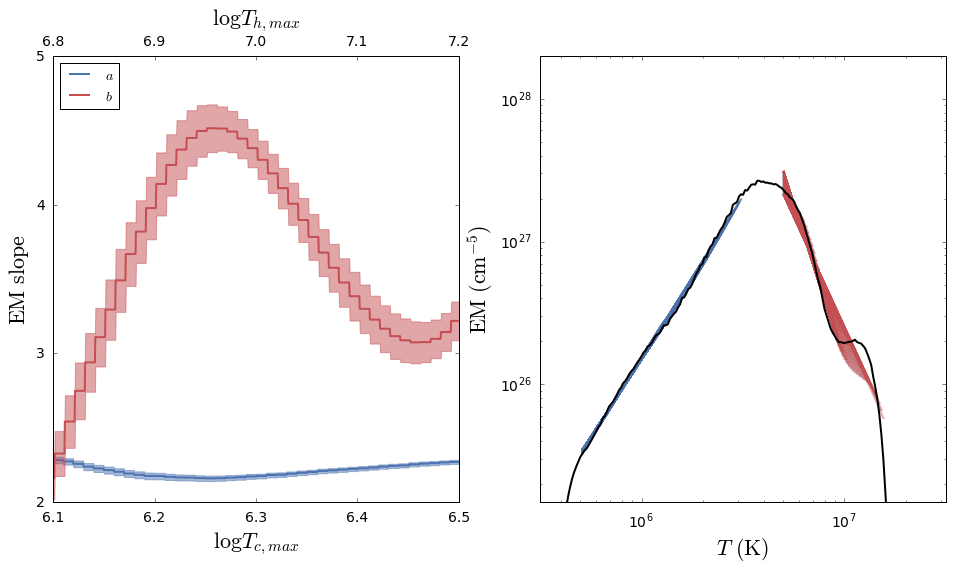

In [18]:
# Plotting EM and slopes
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax_top = ax[0].twiny()
ax_top.set_rasterization_zorder(1)
ax[0].set_rasterization_zorder(1)
ax[1].set_rasterization_zorder(1)
#plot cool lines
line_cool = ax[0].plot(np.log10(tc_max),np.fabs(cool_slopes['a']),color=sns.color_palette('deep')[0],label=r'$a$',
                       zorder=1)
ax[0].fill_between(np.log10(tc_max),np.fabs(cool_slopes['a'])-np.fabs(cool_slopes['sigma']),
                   np.fabs(cool_slopes['a'])+np.fabs(cool_slopes['sigma']),
                  edgecolor=sns.color_palette('deep')[0],facecolor=sns.color_palette('deep')[0],alpha=0.5,zorder=0)
#plot hot lines
line_hot = ax_top.plot(np.log10(th_max),np.fabs(hot_slopes['a']),color=sns.color_palette('deep')[2],label=r'$b$',
                      zorder=1)
ax_top.fill_between(np.log10(th_max),np.fabs(hot_slopes['a'])-np.fabs(hot_slopes['sigma']),
                   np.fabs(hot_slopes['a'])+np.fabs(hot_slopes['sigma']),
                  edgecolor=sns.color_palette('deep')[2],facecolor=sns.color_palette('deep')[2],alpha=0.5,zorder=0)
ax[0].set_xlabel(r'$\log{T_{c,max}}$')
ax_top.set_xlabel(r'$\log{T_{h,max}}$',labelpad=10)
ax[0].set_ylabel(r'$\mathrm{EM}\,\,\mathrm{slope}$')
ax_top.set_xlim([np.log10(th_max[0]),np.log10(th_max[-1])])
ax[0].set_xlim([np.log10(tc_max[0]),np.log10(tc_max[-1])])
ax[0].set_ylim([2,5])
nbins = 4
ax[0].yaxis.set_major_locator(MaxNLocator(nbins=nbins))
nbins = 5
ax[0].xaxis.set_major_locator(MaxNLocator(nbins=nbins))
ax_top.xaxis.set_major_locator(MaxNLocator(nbins=nbins))
#emission measure distribution
ax[1].plot(centers,em_hist,color='k',zorder=1)
for i in range(len(th_max)):
    ax[1].plot(hot_slopes['x'][i],10**(hot_slopes['y'][i]),color=sns.color_palette('deep')[2],alpha=0.025,zorder=0)
for i in range(len(tc_max)):
    ax[1].plot(cool_slopes['x'][i],10**(cool_slopes['y'][i]),color=sns.color_palette('deep')[0],alpha=0.05,zorder=0)
ax[1].set_xlabel(r'$T\,\,(\mathrm{K})$')
ax[1].set_ylabel(r'$\mathrm{EM}\,\,(\mathrm{cm}^{-5})$')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlim([10**(5.5),10**(7.5)])
ax[1].set_ylim([1.5e+25,2e+28])
lines = line_cool + line_hot
labels = [l.get_label() for l in lines]
ax[0].legend(lines,labels,loc=2)
#plt.tight_layout()
plt.savefig(os.path.join(paper_figs_save_root,'em_slope_varying_bounds.pdf'),
            format='pdf',
            dpi=400,
            rasterized=True
           )

## Figure 8
Distribution of Brosius EM ratios for single-fluid case.

In [172]:
#Decide which temperature ratio we want to use here
ratio_index=0

In [140]:
#make file and label list
files,labels=[],[]
species='single'
tmp = os.path.join(figs_root_ieq,save_file_ext+'.lvl2_diagnostics.pickle')
tmp_nei = os.path.join(figs_root_nei,save_file_ext+'.lvl2_diagnostics.pickle')
files.append(tmp%(species,'1.5','1.5',species))
files.append(tmp%(species,'1.5','1.5-b1.0',species))
files.append(tmp%(species,'2.0','2.0',species))
files.append(tmp%(species,'2.0','2.0-b1.0',species))
files.append(tmp%(species,'2.5','2.5',species))
files.append(tmp%(species,'2.5','2.5-b1.0',species))
files.append(tmp%(species,'uniform','uniform',species))
files_nei = []
files_nei.append(tmp_nei%(species,'1.5','1.5',species))
files_nei.append(tmp_nei%(species,'1.5','1.5-b1.0',species))
files_nei.append(tmp_nei%(species,'2.0','2.0',species))
files_nei.append(tmp_nei%(species,'2.0','2.0-b1.0',species))
files_nei.append(tmp_nei%(species,'2.5','2.5',species))
files_nei.append(tmp_nei%(species,'2.5','2.5-b1.0',species))
files_nei.append(tmp_nei%(species,'uniform','uniform',species))
labels=[r'$\alpha=-1.5$, $\beta=0$',r'$\alpha=-1.5$, $\beta=1$',
        r'$\alpha=-2.0$, $\beta=0$',r'$\alpha=-2.0$, $\beta=1$',
        r'$\alpha=-2.5$, $\beta=0$',r'$\alpha=-2.5$, $\beta=1$',
        r'$\mathrm{uniform}$']
labels_nei=len(files_nei)*['nei']

Bin first by type of heating function.

In [141]:
#set histogram options
colors = []
for i in range(int((len(labels)-1)/2)):
    colors.append(sns.color_palette('deep')[i])
    colors.append(sns.color_palette('deep')[i])
colors.append(sns.color_palette('deep')[i+1])
styles = int((len(labels)-1)/2)*['solid','dashed'] + ['solid']
histo_opts = {}
for i in range(len(labels)):
    histo_opts[labels[i]] = {'color':colors[i],
                             'label':labels[i],
                             'linestyle':styles[i],
                             'linewidth':3,
                             'normed':True,
                             'stacked':True}

In [142]:
#build histogram
histmaker_alpha = ebpe.EMHistoBuilder(files,labels,fformat='pdf',fontsize=22.,alfs=14./22.)
histmaker_alpha.load_diagnostics(ratio_index=ratio_index)
histmaker_alpha.make_fit_histogram('ratio',
                                   histo_opts=histo_opts,
                                   leg=True,
                                   x_limits=[0,4],
                                   y_limits=[0,0.85],num_yticks=7,
                                   bin_tool='blocks',
                                   min_stats=15,
                                   bin_tool_opts={'p0':0.01},show_low_N=True,
                                   print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_alpha_%s_T%d'%(species,ratio_index))
                                  )

And then by waiting time, $t_N$

In [143]:
#set histogram options
t_wait = np.arange(250,5250,250)
styles = ['dotted','dashdot','dashed','solid']
interval = 3
colors = []
[colors.extend(len(styles)*[sns.color_palette('deep')[i]]) for i in range(int(len(t_wait)/len(styles)))] 
styles = int(len(t_wait)/len(styles))*styles
leg_labels = [r'$%d$ $\mathrm{s}$'%tw for tw in t_wait]
histo_opts = {}
for i in np.arange(0+interval,len(t_wait)+interval,1+interval):
    histo_opts[str(i)] = {'color':colors[i],
                          'label':leg_labels[i],
                          'linestyle':styles[i],
                          'linewidth':3,
                          'normed':True,
                          'stacked':True}
    histo_opts[str(i)+'-nei'] = {'color':colors[i],
                                 'label':'nei',
                                 'linestyle':'dashed',
                                 'linewidth':3,
                                 'normed':True,
                                 'stacked':True}

In [144]:
#build histogram
histmaker_twait = ebpe.EMHistoBuilder(files+files_nei,labels+labels_nei,group='by_t_wait',fontsize=22.,alfs=14./22.,fformat='pdf')
histmaker_twait.load_diagnostics(ratio_index=ratio_index,t_wait_interval=interval,include_nei=False)
histmaker_twait.make_fit_histogram('ratio',
                                   histo_opts=histo_opts,
                                   leg=True,
                                   x_limits=[0.,4],
                                   y_limits=[0,1.7],
                                   bin_tool='blocks',
                                   bin_tool_opts={'p0':0.005},num_yticks=7,
                                   print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_twait_%s_T%d'%(species,ratio_index))
                                  )

## Figure 9
Distribution of Brosius EM ratios as a function of wait-time (and heating function type) for electron heating, ionization equilibrium. Probably only need to deal with ionization equilibrium here because we showed in the last (two) sections that NEI is really only important for uniform heating. 

In [145]:
#make file and label list
files,labels=[],[]
species='electron'
tmp = os.path.join(figs_root_ieq,save_file_ext+'.lvl2_diagnostics.pickle')
tmp_nei = os.path.join(figs_root_nei,save_file_ext+'.lvl2_diagnostics.pickle')
files.append(tmp%(species,'1.5','1.5',species))
files.append(tmp%(species,'1.5','1.5-b1.0',species))
files.append(tmp%(species,'2.0','2.0',species))
files.append(tmp%(species,'2.0','2.0-b1.0',species))
files.append(tmp%(species,'2.5','2.5',species))
files.append(tmp%(species,'2.5','2.5-b1.0',species))
files.append(tmp%(species,'uniform','uniform',species))
files_nei = []
files_nei.append(tmp_nei%(species,'1.5','1.5',species))
files_nei.append(tmp_nei%(species,'1.5','1.5-b1.0',species))
files_nei.append(tmp_nei%(species,'2.0','2.0',species))
files_nei.append(tmp_nei%(species,'2.0','2.0-b1.0',species))
files_nei.append(tmp_nei%(species,'2.5','2.5',species))
files_nei.append(tmp_nei%(species,'2.5','2.5-b1.0',species))
files_nei.append(tmp_nei%(species,'uniform','uniform',species))
labels=[r'$\alpha=-1.5$, $\beta=0$',r'$\alpha=-1.5$, $\beta=1$',
        r'$\alpha=-2.0$, $\beta=0$',r'$\alpha=-2.0$, $\beta=1$',
        r'$\alpha=-2.5$, $\beta=0$',r'$\alpha=-2.5$, $\beta=1$',
        r'$\mathrm{uniform}$']
labels_nei=len(files_nei)*['nei']

First, bin by the type of heating function.

In [146]:
#set histogram options
colors = []
for i in range(int((len(labels)-1)/2)):
    colors.append(sns.color_palette('deep')[i])
    colors.append(sns.color_palette('deep')[i])
colors.append(sns.color_palette('deep')[i+1])
styles = int((len(labels)-1)/2)*['solid','dashed'] + ['solid']
histo_opts = {}
for i in range(len(labels)):
    histo_opts[labels[i]] = {'color':colors[i],
                             'label':labels[i],
                             'linestyle':styles[i],
                             'linewidth':3,
                             'normed':True,
                             'stacked':True}

In [147]:
#build histogram
histmaker_alpha = ebpe.EMHistoBuilder(files,labels,fformat='pdf',fontsize=22.,alfs=14./22.)
histmaker_alpha.load_diagnostics(ratio_index=ratio_index)
histmaker_alpha.make_fit_histogram('ratio',
                                   histo_opts=histo_opts,
                                   leg=True,
                                   x_limits=[0.,4],
                                   y_limits=[0,1.35],num_yticks=6,
                                   bin_tool='blocks',
                                   min_stats=20,
                                   bin_tool_opts={'p0':0.01},show_low_N=True,
                                   print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_alpha_%s_T%d'%(species,ratio_index))
                                  )

Then, bin by the waiting time.

In [148]:
#set histogram options
t_wait = np.arange(250,5250,250)
styles = ['dotted','dashdot','dashed','solid']
interval = 3
colors = []
[colors.extend(len(styles)*[sns.color_palette('deep')[i]]) for i in range(int(len(t_wait)/len(styles)))] 
styles = int(len(t_wait)/len(styles))*styles
leg_labels = [r'$%d$ $\mathrm{s}$'%tw for tw in t_wait]
histo_opts = {}
for i in np.arange(0+interval,len(t_wait)+interval,1+interval):
    histo_opts[str(i)] = {'color':colors[i],
                          'label':leg_labels[i],
                          'linestyle':styles[i],
                          'linewidth':3,
                          'normed':True,
                          'stacked':True}
    histo_opts[str(i)+'-nei'] = {'color':colors[i],
                                 'label':'nei',
                                 'linestyle':'dashed',
                                 'linewidth':3,
                                 'normed':True,
                                 'stacked':True}

In [149]:
#build histogram
histmaker_twait = ebpe.EMHistoBuilder(files+files_nei,labels+labels_nei,group='by_t_wait',fontsize=22.,alfs=14./22.,fformat='pdf')
histmaker_twait.load_diagnostics(ratio_index=ratio_index,t_wait_interval=interval,include_nei=False,t_wait_length=len(t_wait))
histmaker_twait.make_fit_histogram('ratio',
                                   histo_opts=histo_opts,
                                   leg=True,
                                   x_limits=[0,4],
                                   y_limits=[0,2.1],num_yticks=6,
                                   bin_tool='blocks',
                                   min_stats=15,
                                   bin_tool_opts={'p0':0.01},
                                   print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_twait_%s_T%d'%(species,ratio_index))
                                  )

## Figure 10
Same as Figure 8, but for ion heating.

In [173]:
#make file and label list
files,labels=[],[]
species='ion'
tmp = os.path.join(figs_root_ieq,save_file_ext+'.lvl2_diagnostics.pickle')
files.append(tmp%(species,'1.5','1.5',species))
files.append(tmp%(species,'1.5','1.5-b1.0',species))
files.append(tmp%(species,'2.0','2.0',species))
files.append(tmp%(species,'2.0','2.0-b1.0',species))
files.append(tmp%(species,'2.5','2.5',species))
files.append(tmp%(species,'2.5','2.5-b1.0',species))
files.append(tmp%(species,'uniform','uniform',species))
files_nei = []
files_nei.append(tmp_nei%(species,'1.5','1.5',species))
files_nei.append(tmp_nei%(species,'1.5','1.5-b1.0',species))
files_nei.append(tmp_nei%(species,'2.0','2.0',species))
files_nei.append(tmp_nei%(species,'2.0','2.0-b1.0',species))
files_nei.append(tmp_nei%(species,'2.5','2.5',species))
files_nei.append(tmp_nei%(species,'2.5','2.5-b1.0',species))
files_nei.append(tmp_nei%(species,'uniform','uniform',species))
labels=[r'$\alpha=-1.5$, $\beta=0$',r'$\alpha=-1.5$, $\beta=1$',
        r'$\alpha=-2.0$, $\beta=0$',r'$\alpha=-2.0$, $\beta=1$',
        r'$\alpha=-2.5$, $\beta=0$',r'$\alpha=-2.5$, $\beta=1$',
        r'$\mathrm{uniform}$']
labels_nei=len(files_nei)*['nei']

First, bin by type of heating function.

In [174]:
#set histogram options
colors = []
for i in range(int((len(labels)-1)/2)):
    colors.append(sns.color_palette('deep')[i])
    colors.append(sns.color_palette('deep')[i])
colors.append(sns.color_palette('deep')[i+1])
styles = int((len(labels)-1)/2)*['solid','dashed'] + ['solid']
histo_opts = {}
for i in range(len(labels)):
    histo_opts[labels[i]] = {'color':colors[i],
                             'label':labels[i],
                             'linestyle':styles[i],
                             'linewidth':3,
                             'normed':True,
                             'stacked':True}

In [189]:
#build histogram
histmaker_alpha = ebpe.EMHistoBuilder(files,labels,fformat='pdf',fontsize=22.,alfs=14./22.)
histmaker_alpha.load_diagnostics(ratio_index=ratio_index)
histmaker_alpha.make_fit_histogram('ratio',
                                   histo_opts=histo_opts,
                                   leg=True,leg_loc=1,ncols_leg=1,
                                   x_limits=[0,4],
                                   y_limits=[0,0.8],num_yticks=5,
                                   bin_tool='blocks',
                                   min_stats=15,
                                   bin_tool_opts={'p0':0.01},show_low_N=True,
                                   print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_alpha_%s_T%d'%(species,ratio_index))
                                  )

Then by waiting time.

In [153]:
#set histogram options
t_wait = np.arange(250,5250,250)
styles = ['dotted','dashdot','dashed','solid']
interval = 3
colors = []
[colors.extend(len(styles)*[sns.color_palette('deep')[i]]) for i in range(int(len(t_wait)/len(styles)))] 
styles = int(len(t_wait)/len(styles))*styles
leg_labels = [r'$%d$ $\mathrm{s}$'%tw for tw in t_wait]
histo_opts = {}
for i in np.arange(0+interval,len(t_wait)+interval,1+interval):
    histo_opts[str(i)] = {'color':colors[i],
                          'label':leg_labels[i],
                          'linestyle':styles[i],
                          'linewidth':3,
                          'normed':True,
                          'stacked':True}
    histo_opts[str(i)+'-nei'] = {'color':colors[i],
                                 'label':'nei',
                                 'linestyle':'dashed',
                                 'linewidth':3,
                                 'normed':True,
                                 'stacked':True}

In [154]:
#build histogram
histmaker_twait = ebpe.EMHistoBuilder(files+files_nei,labels+labels_nei,group='by_t_wait',fontsize=22.,alfs=14./22.,fformat='pdf')
histmaker_twait.load_diagnostics(ratio_index=ratio_index,t_wait_interval=interval,include_nei=False)
histmaker_twait.make_fit_histogram('ratio',
                                   histo_opts=histo_opts,
                                   leg=True,
                                   x_limits=[0,4],
                                   y_limits=[0,1.0],
                                   bin_tool='blocks',
                                   leg_loc=1,
                                   min_stats=15,
                                   bin_tool_opts={'p0':0.01},
                                   print_fig_filename=os.path.join(paper_figs_save_root,'ratio_hist_twait_%s_T%d'%(species,ratio_index))
                                  )

## Figure 11
Show EM ratio as a function of $t_N$ for a couple of different scenarios and plot them as a few panels to show how changing the chosen temperature ratio can affect the resulting distributions.

First, compute the needed results using the preprocessed files and some of the DEM helpers.

In [155]:
filename_template = '/data/datadrive2/EBTEL_figs/{0}_heating_runs/alpha{2}/ebtel_L40.0_tpulse200.0_alpha{2}{1}_{0}_heating.lvl2_diagnostics.pickle'

In [156]:
#set temperatures and labels
t_ratio_cool=2*[10**6.187878788,10**6.342424242]
t_ratio_hot=2*[10**6.942424242]+2*[10**7.027272727]
pair_labels = [r'$\mathrm{Fe}$ $\mathrm{XIX/XII}$',
               r'$\mathrm{Fe}$ $\mathrm{XIX/XV}$',
               r'$\mathrm{Fe}$ $\mathrm{XX/XII}$',
               r'$\mathrm{Fe}$ $\mathrm{XX/XV}$']
pair_colors = [sns.color_palette('deep')[j] for j in range(len(pair_labels))]
pair_colors[-1] = sns.color_palette('deep')[len(pair_labels)]

In [157]:
process = ebd.DEMProcess('','','','',2.5,40.0,200.0,'rka4')
process.em_ratio_tpairs = [[tc,th] for tc,th in zip(t_ratio_cool,t_ratio_hot)]

Parameters not yet set. Run self.set_data(t,T,n)


In [158]:
params = {'electron':{'beta_1':None,'beta_0':None},
          'ion':{'beta_1':None,'beta_0':None},
          'single':{'beta_1':None,'beta_0':None}
         }   

In [159]:
#load data
for p in params:
    #beta0 case
    with open(filename_template.format(p,'',2.5),'rb') as f:
        process.diagnostics = pickle.load(f)
    process.calc_diagnostic_stats()
    params[p]['beta_0'] = copy.deepcopy(process.diagnostics_stats)
    #beta1 case
    with open(filename_template.format(p,'-b1.0',2.5),'rb') as f:
        process.diagnostics = pickle.load(f)
    process.calc_diagnostic_stats()
    params[p]['beta_1'] = copy.deepcopy(process.diagnostics_stats)

Now, create the figure.

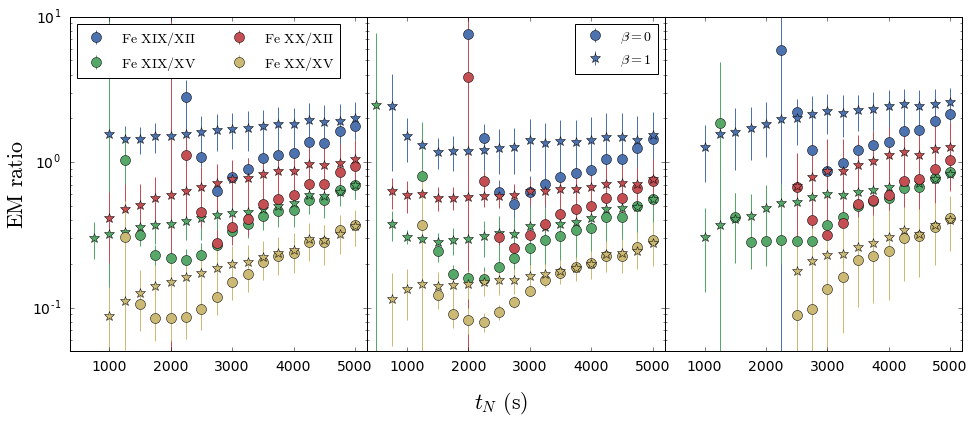

In [160]:
#figure
fig,axes = plt.subplots(1,3,figsize=(16,6),sharey=True,sharex=True)
plt.subplots_adjust(wspace=0.0)
for j in range(len(process.em_ratio_tpairs)):
    for ax,species in zip(axes.flatten(),['single','electron','ion']):
        label1,label2 = None,None
        if species=='single': label1,label2 = pair_labels[j],None
        if species=='electron': label1,label2 = r'$\beta=0$',r'$\beta=1$'
        mean1 = np.array([params[species]['beta_0'][i]['ratio']['mean'][j] if params[species]['beta_0'][i]['ratio']['mean'][j] else np.nan for i in range(len(process.Tn))])
        mean2 = np.array([params[species]['beta_1'][i]['ratio']['mean'][j] if params[species]['beta_1'][i]['ratio']['mean'][j] else np.nan for i in range(len(process.Tn))])
        sigma1 = np.array([params[species]['beta_0'][i]['ratio']['sigma'][j] if params[species]['beta_0'][i]['ratio']['sigma'][j] and params[species]['beta_0'][i]['ratio']['sigma'][j] < 100 else np.nan for i in range(len(process.Tn))])
        sigma2 = np.array([params[species]['beta_1'][i]['ratio']['sigma'][j] if params[species]['beta_1'][i]['ratio']['sigma'][j] and params[species]['beta_1'][i]['ratio']['sigma'][j] < 100 else np.nan for i in range(len(process.Tn))])
        ax.errorbar(process.Tn,mean1,yerr=sigma1,fmt='o',
                         color=pair_colors[j],label=label1,
                         markersize=10,capsize=0,elinewidth=1
                        )
        #ax.fill_between(process.Tn,mean1-sigma1,mean1+sigma1,color=pair_colors[j],alpha=0.2)
        ax.errorbar(process.Tn,mean2,yerr=sigma2,fmt='*',
                         color=pair_colors[j],label=label2,
                         markersize=10,capsize=0,elinewidth=1
                        )
        #ax.fill_between(process.Tn,mean2-sigma2,mean2+sigma2,color=pair_colors[j],alpha=0.1,hatch='X')
#set axes options
fig.text(0.5, 0.005, r'$t_N$ $\mathrm{(s)}$', ha='center', va='center',fontsize=22)
axes[0].set_ylabel(r'$\mathrm{EM}$ $\mathrm{ratio}$')
axes[0].set_ylim([0.05,10])
axes[0].set_xlim([process.Tn[0]+100,process.Tn[-1]+200])
axes[0].set_yscale('log')
#legends
axes[0].legend(loc=2,ncol=2,numpoints=1)
hand,lab=axes[1].get_legend_handles_labels()
hand = hand[0:2]
lab=lab[0:2]
axes[1].legend(hand,lab,numpoints=1,loc=1)
plt.savefig(os.path.join(paper_figs_save_root,'em_ratio_versus_tn.pdf'),
            format='pdf'
           )